k-近邻算法(k-nearest neighbor classifier, KNN)：该算法是惰性学习算法的典型例子，仅仅对训练数据集有记忆功能，而不会从训练集中通过学习得到一个判别函数。

机器学习算法可以划分为参数化模型和非参数化模型。
使用参数化模型时，需要通过训练数据估计参数，通过学习得到一个模式，以便在无需原始训练数据信息的情况下对新的数据点进行分类操作。典型的包括：感知器，logistics回归和线性支持向量机等等。
非参数化模型无法通过一组固定的参数来表征，参数的数量会随着训练数据的增加而递增。典型的包括：决策树(随机森林)，核函数SVM等等。
KNN算法的操作流程可以总结为以下几点：
1)选择近邻的数量k和距离度量方法；
2)找到待分类样本的k个最近邻居；
3)根据最近邻的类标进行多数投票。

KNN算法的优点在于分类器可以快速地适应新的训练数据，不过缺点也是显而易见的，在最坏的情况下，计算复杂度随着样本数量的增多而呈线性增长，除非数据集中的样本维度有限，而且使用了高效的数据结构。

就是在训练集中数据和标签已知的情况下，输入测试数据，将测试数据的特征与训练集中对应的特征进行相互比较，找到训练集中与之最为相似的前K个数据，则该测试数据对应的类别就是K个数据中出现次数最多的那个分类，其算法的描述为：

1）计算测试数据与各个训练数据之间的距离

2）按照距离的递增关系进行排序

3）选取距离最小的K个点

4）确定前K个点所在类别的出现频率

5）返回前K个点中出现频率最高的类别作为测试数据的预测分类

KNN算法无需训练，易于实现，但是随着数据集样本数量的增加，计算量会急剧上升。另一个缺点是如果数据集中各个类别的样本数量相差很大时，就会导致测试样本大概率被判为数量大的类别。KNN提出时间较早，如今也出现了许多改良版本的算法，详情请参考相关文献。使用以下代码调用scikit-learn库，以欧几里得距离作为距离的度量函数，可以很容易地实现了一个KNN模型。

###### 1.导入鸢尾花数据集并且进行数据的预处理

In [1]:
from sklearn.model_selection import train_test_split # 新版本的sklearn库中sklearn.cross_validation库被抛弃，改成model_selection
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # 取花瓣长度和花瓣宽度两个特征值
y = iris.target # 鸢尾花数据集有150个数据，在sklearn库中已经定义好了稀疏化的标签0，1，2
np.unique(y) # np.unique()函数可以将数组中重复的值去掉

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(y_test)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # 对测试集做标准化处理时，要用训练集计算得到均值和和标准差
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


###### 2.绘制决策区域

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ['s','x', 'o','^','v']
    colors = ['red', 'blue','lightgreen', 'gray','cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    """
    plot the decision surface
    将最大值，最小值向量生成二维数组xx1,xx2
    np.arange(x1_min, x1_max, resolution) 最小值最大值之间生成序列，步长为resolution
    ---
    """
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    new_x1 = np.arange(x1_min, x1_max, resolution)
    new_x2 = np.arange(x2_min, x2_max, resolution)
    xx1, xx2 = np.meshgrid(new_x1, new_x2)

    # xx1, xx2 = np.meshgrid(np.array(x1_min, x1_max, resolution), np.array(x2_min, x2_max, resolution))
    # 预测值
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 绘制等高线(轮廓)，使用不同的颜色对不同区域进行填充，不专门绘制等高线，但不同颜色的分界即可代表等高线
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx ,c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, cmap=cmap, marker=markers[idx], label=c1)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolors='red', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

###### 3.调用scikit-learn库实现KNN模型

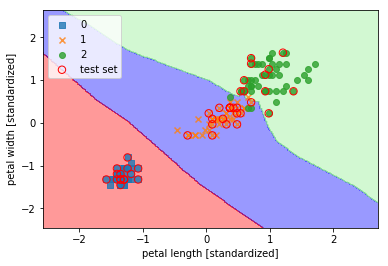

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))# 合并数组
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc="upper left")
plt.show()

注：对KNN来说，找到正确的k值(代码中的n_neighbors参数)是在过拟合和欠拟合之间找到平衡的关键所在。还必须确定所选的距离度量标准适用于数据集中的特征。代码中用到的“闵可夫斯基”（'minkowski'）距离是对欧几里得距离及曼哈顿距离的一种泛化。其公式如下：
$$
d\left(\boldsymbol{x}^{(i)}, p=2\boldsymbol{x}^{(i)}\right)=\sqrt[p]{\sum_{k}\left|x_{k}^{(i)} x_{k}^{(j)}\right|^{p}}
$$
如果将参数设置为p=2,则为欧几里得距离；p=1就是曼哈顿距离。